# Target Definition

## Discrete Time Gross Return

### $$r_{\text{discrete}} = \frac{S_t - S_{t-1}}{S_{t-1}}$$

$$y = \log(\frac{C_{t+1}}{C_{t}})$$

In [1]:
import pandas as pd
import numpy as np

df = pd.read_parquet("../data/data1.parquet")
df["future_return"] = df.groupby("symbol_id")["price_close"].apply(lambda x: x.shift(-1) / x).reset_index(level=0, drop=True)
print(df["future_return"].describe())
df.head(3)


count    172202.000000
mean          0.999999
std           0.004436
min           0.768229
25%           0.998081
50%           1.000000
75%           1.001897
max           1.230508
Name: future_return, dtype: float64


,symbol_id,time_period_start,time_period_end,price_open,price_high,price_low,price_close,volume_traded,trades_count,future_return
0,ADA,2025-06-17 22:30,2025-06-17 22:45,0.607916,0.608179,0.606332,0.606994,269705.314157,128,0.998670
1,AVAX,2025-06-17 22:30,2025-06-17 22:45,18.460000,18.460000,18.420000,18.420000,102.834109,19,0.996743
2,BTC,2025-06-17 22:30,2025-06-17 22:45,104575.300000,104604.800000,104494.700000,104604.700000,2.644289,162,0.996592


# Visualizing Cross-Sectional Rankings
> Look for **volatility clustering**, **fat tails**, **regime changes**

In [7]:
df["rank"] = df.groupby("time_period_start")["future_return"].rank(ascending=False)
df.head(10).sort_values(by="rank", ascending=True)

,symbol_id,time_period_start,time_period_end,price_open,price_high,price_low,price_close,volume_traded,trades_count,future_return,rank
0,ADA,2025-06-17 22:30,2025-06-17 22:45,0.607916,0.608179,0.606332,0.606994,2.697053e+05,128,0.998670,1.0
6,LINK,2025-06-17 22:30,2025-06-17 22:45,12.918880,12.919070,12.891350,12.910450,2.360670e+03,31,0.997534,2.0
9,XRP,2025-06-17 22:30,2025-06-17 22:45,2.153410,2.153410,2.146950,2.151310,2.283983e+05,293,0.997453,3.0
4,DOT,2025-06-17 22:30,2025-06-17 22:45,3.707900,3.708900,3.702400,3.708900,8.013484e+02,14,0.997277,4.0
7,LTC,2025-06-17 22:30,2025-06-17 22:45,84.080000,84.130000,83.960000,83.990000,8.607405e+01,39,0.997023,5.0
3,DOGE,2025-06-17 22:30,2025-06-17 22:45,0.169588,0.169588,0.169160,0.169160,2.071852e+06,72,0.996787,6.0
1,AVAX,2025-06-17 22:30,2025-06-17 22:45,18.460000,18.460000,18.420000,18.420000,1.028341e+02,19,0.996743,7.0
2,BTC,2025-06-17 22:30,2025-06-17 22:45,104575.300000,104604.800000,104494.700000,104604.700000,2.644289e+00,162,0.996592,8.0
8,SOL,2025-06-17 22:30,2025-06-17 22:45,147.230000,147.270000,146.970000,147.030000,3.072505e+02,50,0.996123,9.0
5,ETH,2025-06-17 22:30,2025-06-17 22:45,2510.220000,2511.450000,2506.960000,2510.360000,6.688134e+01,57,0.993646,10.0


## Feature vs. Cross Sectional Rank

1. Does low `feature` correspond to high ranks?
2. Does high `feature` correspond to low ranks?
3. Is there any monotonic tendency?
    - Does this variable consistently go in one direction?

### Relative Strength Index (RSI)

In [3]:
import pandas_ta as ta

RSI14 = ta.rsi(df["price_close"], length=14)
RSI30 = ta.rsi(df["price_close"], length=30)
RSI200 = ta.rsi(df["price_close"], length=200)

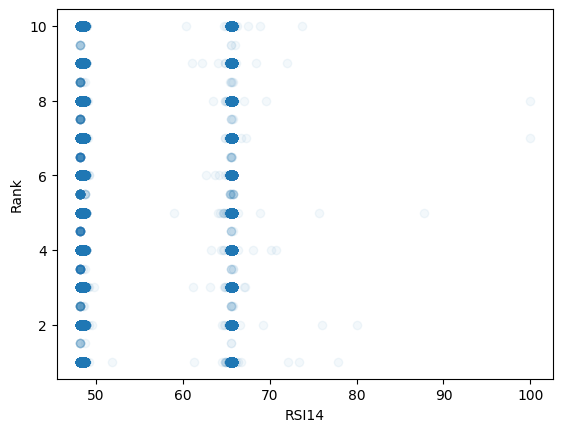

In [11]:
import matplotlib.pyplot as plt

plt.scatter(
    x = RSI14,
    y = df['rank'],
    alpha = .05
)

plt.xlabel('RSI14')
plt.ylabel('Rank')

plt.show()


<span style="color:red">
    When scattering the the rank with RSI, why does it look like this?
</span>

## Quantile Bucket Plots

### Tukey Mosteller

Helps us to achieve a linear relationship between the target and the features.

<div style="text-align: center;">
    <img src="/Users/nrd/marketdata/notebooks/img/Selection_005.png" alt="Target" width="200">
</div>

# Target Definition

### Next Return

$$y = log(\frac{C_{t+1}}{C_t})$$

Other options:
- Future k-step return
- Future volatility
- Future price delta

If the target is:

Heavy-tailed → robust losses

Near-zero mean → very low signal-to-noise

Non-stationary → differencing required

# Split

In [ ]:
X = df.drop(columns=["price_close"])
y = df["price_close"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=False   # IMPORTANT for time-series
)

In [ ]:
len(y_train)

# Analysis

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y_train)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import MinMaxScaler
import pyarrow

df = pd.read_csv("../data/kraken_15min_6mo_ohlcv.csv")

mapping = {
    "KRAKEN_SPOT_BTC_USD": "BTC",
    "KRAKEN_SPOT_ETH_USD": "ETH",
    "KRAKEN_SPOT_SOL_USD": "SOL",
    "KRAKEN_SPOT_XRP_USD": "XRP",
    "KRAKEN_SPOT_ADA_USD": "ADA",
    "KRAKEN_SPOT_DOGE_USD": "DOGE",
    "KRAKEN_SPOT_LTC_USD": "LTC",
    "KRAKEN_SPOT_AVAX_USD": "AVAX",
    "KRAKEN_SPOT_LINK_USD": "LINK",
    "KRAKEN_SPOT_DOT_USD": "DOT",
}

df["symbol_id"] = df["symbol_id"].replace(mapping)   # or .map(mapping) if exhaustive
 
df_raw = df.drop(columns=["symbol_id", 
                    "time_period_start", 
                    "time_period_end",
                    "time_open",
                    "time_close"
                    ])

df_raw.columns

In [ ]:
y = df_raw["price_close"]

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y)
plt.show()

# EXCESS CODE

In [ ]:
close = df_raw["price_close"] 
returns = np.log(df_raw["price_close"]).diff()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(close)
ax1.set_title('Price Close')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price')

ax2.hist(returns.dropna(), bins=200)
ax2.set_title('Distribution of Returns')
ax2.set_xlabel('Returns')
ax2.set_ylabel('Frequency')

plt.tight_layout()  
plt.show()

In [ ]:
plt.plot(df_raw["price_close"])

In [ ]:
returns = np.log(df_raw["price_close"]).diff()
plt.hist(returns.dropna(), bins=200);

In [ ]:
import pandas_ta as ta

df_raw["EMA10"]   = ta.ema(df_raw["price_close"], length=10)
df_raw["EMA30"]   = ta.ema(df_raw["price_close"], length=30)
df_raw["EMA200"]  = ta.ema(df_raw["price_close"], length=200)

df_raw["RSI14"]   = ta.rsi(df_raw["price_close"], length=14)
df_raw["RSI30"]   = ta.rsi(df_raw["price_close"], length=30)
df_raw["RSI200"]  = ta.rsi(df_raw["price_close"], length=200)

df_raw["MOM10"]   = ta.mom(df_raw["price_close"], length=10)
df_raw["MOM30"]   = ta.mom(df_raw["price_close"], length=30)

df_raw["PROC9"]   = ta.roc(df_raw["price_close"], length=9)

df_raw["MACD"]    = ta.macd(df_raw["price_close"])["MACD_12_26_9"]

stoch10           = ta.stoch(df_raw["price_high"], df_raw["price_low"], df_raw["price_close"], k=10, d=3)
df_raw["K10"]     = stoch10["STOCHk_10_3_3"]

stoch30           = ta.stoch(df_raw["price_high"], df_raw["price_low"], df_raw["price_close"], k=30, d=3)
df_raw["K30"]     = stoch30["STOCHk_30_3_3"]

stoch200          = ta.stoch(df_raw["price_high"], df_raw["price_low"], df_raw["price_close"], k=200, d=3)
df_raw["K200"]    = stoch200["STOCHk_200_3_3"]

df_raw = df_raw.dropna().reset_index(drop=True)


In [ ]:
class MinMaxScaler:

    def __init__(self):
        self.min = None
        self.max = None

    def fit(self, X):
        self.min = np.min(X, axis=0)
        self.max = np.max(X, axis=0)
        
        return self

    def transform(self, X):
        return (X - self.min) / (self.max - self.min)

    def fit_transform(self, X):
        """
        Fit using X and then transform it. Useful when we need to scale just once.
        """
        self.fit(X)
        return self.transform(X)

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_raw),
    columns=df_raw.columns,
    index=df_raw.index
)

df_scaled.head()

In [ ]:
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)

df_scaled.head()

## PCA

# Drop initial rows with NaNs from long windows (e.g., EMA200, RSI200, K200)
df_raw = df_raw.dropna().reset_index(drop=True)

# Select the 18 features in the paper
feature_cols = [
    "price_open",
    "price_high",
    "price_low",
    "volume_traded",
    "trades_count",
    "EMA10",
    "EMA30",
    "EMA200",
    "RSI14",
    "RSI30",
    "RSI200",
    "MOM10",
    "MOM30",
    "PROC9",
    "MACD",
    "K10",
    "K30",
    "K200"
]

target = "price_close"

X = df_raw[feature_cols]